In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Display plots inside the notebook
%matplotlib inline

print("Libraries imported successfully!")


Libraries imported successfully!


In [4]:
# Load the CSV file (make sure the CSV is in the same folder)
data = pd.read_csv("Advertising_Data.csv")

# Display the first 5 rows
data.head()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
0,281.42,538.80,123.94,349.30,242.77,910.10,7164.0
1,702.97,296.53,558.13,180.55,781.06,132.43,5055.0
2,313.14,295.94,642.96,505.71,438.91,464.23,6154.0
3,898.52,61.27,548.73,240.93,278.96,432.27,5480.0
4,766.52,550.72,651.91,666.33,396.33,841.93,9669.0


In [5]:
# Check data info and summary statistics
print("Dataset Info:")
print(data.info())

print("\nSummary Statistics:")
print(data.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TV                    300 non-null    float64
 1   Billboards            300 non-null    float64
 2   Google_Ads            300 non-null    float64
 3   Social_Media          300 non-null    float64
 4   Influencer_Marketing  300 non-null    float64
 5   Affiliate_Marketing   300 non-null    float64
 6   Product_Sold          300 non-null    float64
dtypes: float64(7)
memory usage: 16.5 KB
None

Summary Statistics:
               TV  Billboards  Google_Ads  Social_Media  Influencer_Marketing  \
count  300.000000  300.000000  300.000000    300.000000            300.000000   
mean   517.431000  502.644933  512.444133    489.800100            465.732567   
std    288.114792  275.842369  285.422376    273.883915            288.314080   
min      1.040000    3.630000   

In [6]:
data.columns


Index(['TV', 'Billboards', 'Google_Ads', 'Social_Media',
       'Influencer_Marketing', 'Affiliate_Marketing', 'Product_Sold'],
      dtype='object')

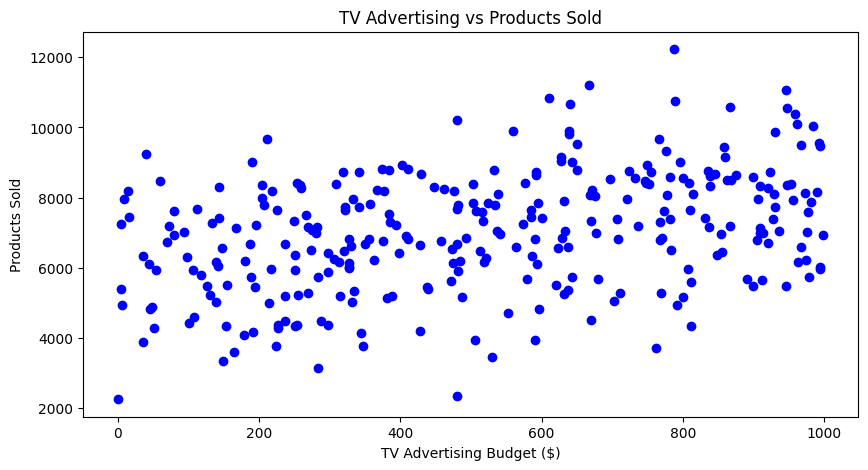

In [7]:
# Visualize relationships between advertising channels and product sales

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.scatter(data["TV"], data["Product_Sold"], color='blue')
plt.title("TV Advertising vs Products Sold")
plt.xlabel("TV Advertising Budget ($)")
plt.ylabel("Products Sold")
plt.show()


In [8]:
# Check correlation between variables
correlation = data.corr()
correlation


,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
TV,1.000000,-0.028851,0.025265,-0.038993,0.009970,0.087524,0.374228
Billboards,-0.028851,1.000000,0.052991,0.048722,-0.005815,-0.041060,0.480593
Google_Ads,0.025265,0.052991,1.000000,0.040265,-0.059243,-0.131834,0.203678
Social_Media,-0.038993,0.048722,0.040265,1.000000,-0.042679,-0.019522,0.401088
Influencer_Marketing,0.009970,-0.005815,-0.059243,-0.042679,1.000000,-0.047093,0.140844
Affiliate_Marketing,0.087524,-0.041060,-0.131834,-0.019522,-0.047093,1.000000,0.611603
Product_Sold,0.374228,0.480593,0.203678,0.401088,0.140844,0.611603,1.000000


In [9]:
from sklearn.linear_model import LinearRegression

# Define features and target
X = data[["TV", "Billboards", "Google_Ads", "Social_Media",
          "Influencer_Marketing", "Affiliate_Marketing"]]
y = data["Product_Sold"]

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 0.08869523475550523
Coefficients: [2.00111048 2.99803879 1.49974348 2.50002106 1.19984407 3.99891569]


In [10]:
# Import LinearRegression from scikit-learn
from sklearn.linear_model import LinearRegression
import pandas as pd  # just in case you need it for displaying results


In [11]:
# Define features (independent variables) and target (dependent variable)
X = data[["TV", "Billboards", "Google_Ads", "Social_Media",
          "Influencer_Marketing", "Affiliate_Marketing"]]
y = data["Product_Sold"]

# Create the Linear Regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Make predictions (optional)
y_pred = model.predict(X)


In [12]:
# Print intercept
print("Intercept:", model.intercept_)

# Print coefficients
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

# Optional: R-squared score
print("R^2 score:", model.score(X, y))


Intercept: 0.08869523475550523
                      Coefficient
TV                       2.001110
Billboards               2.998039
Google_Ads               1.499743
Social_Media             2.500021
Influencer_Marketing     1.199844
Affiliate_Marketing      3.998916
R^2 score: 0.9999637541828039


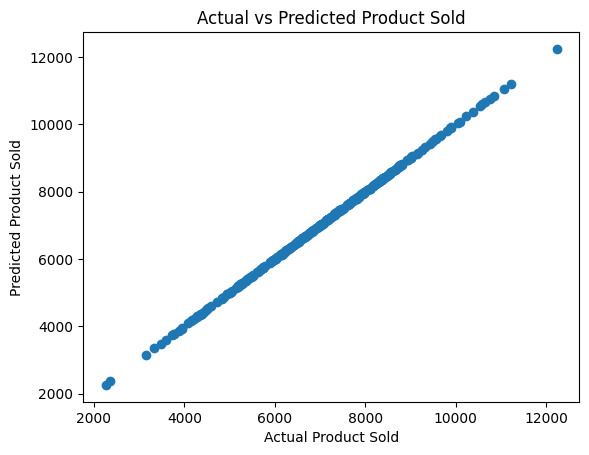

In [13]:
import matplotlib.pyplot as plt

plt.scatter(y, y_pred)
plt.xlabel("Actual Product Sold")
plt.ylabel("Predicted Product Sold")
plt.title("Actual vs Predicted Product Sold")
plt.show()


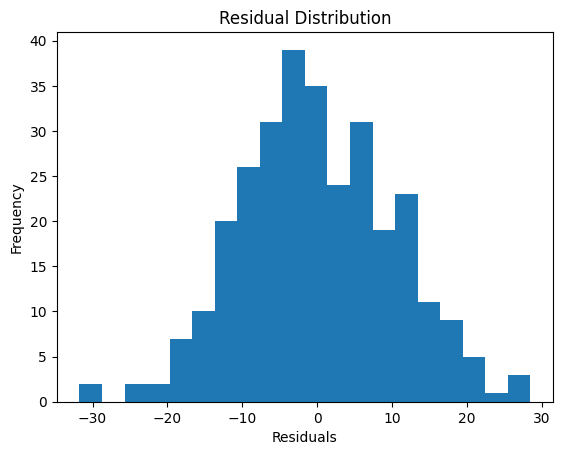

In [14]:
residuals = y - y_pred
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()


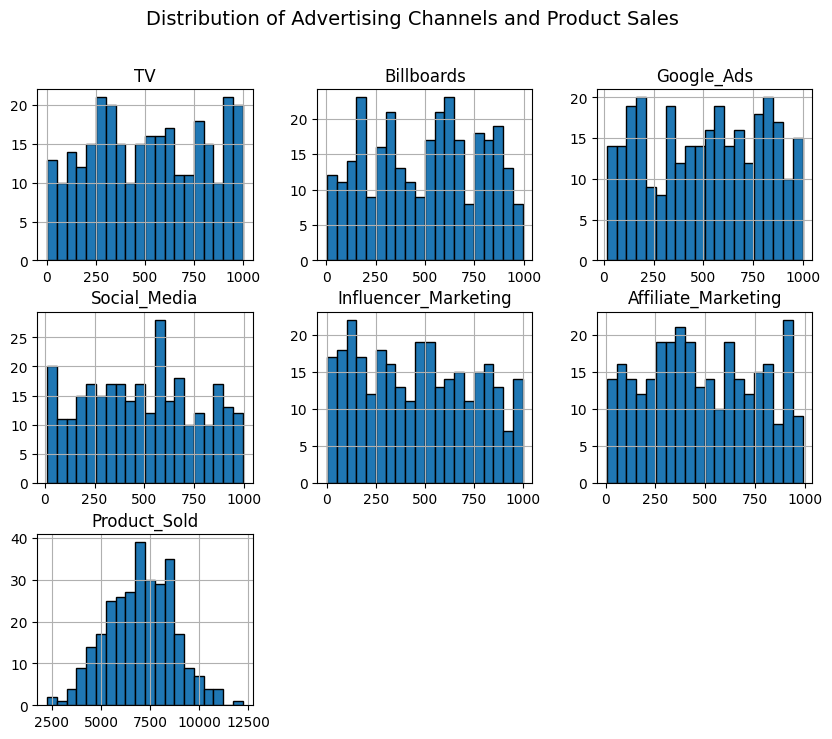

In [15]:
# Plot histograms for all numeric columns
data.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle("Distribution of Advertising Channels and Product Sales", fontsize=14)
plt.show()


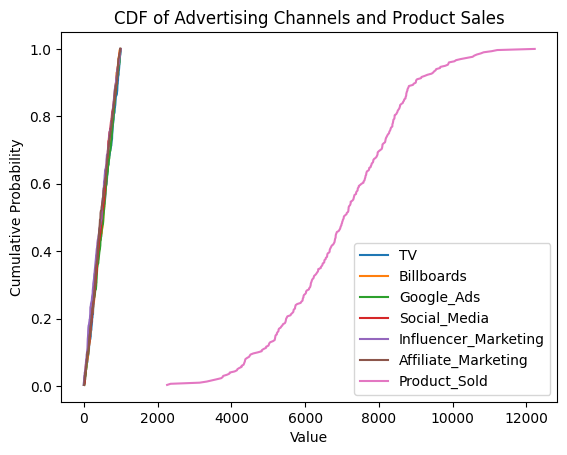

In [16]:
# Plot CDF for each feature
for column in data.columns:
    sorted_data = np.sort(data[column])
    yvals = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    plt.plot(sorted_data, yvals, label=column)

plt.title("CDF of Advertising Channels and Product Sales")
plt.xlabel("Value")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.show()
